### Animation of Wind Direction

In [28]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py
import datetime as dt

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#math
import numpy as np
import math
import scipy.fftpack
from scipy import signal
import scipy.interpolate as interpolate
from scipy import integrate
pd.TimeSeries = pd.Series 

#gps
from geopy import distance
import geopandas as gpd
import utm

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.lines as mlines
from IPython.display import HTML


In [29]:
df=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/test_animation_bag02_run02/anim_time.hdf')
we=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/test_animation_bag02_run02/ewdatabag02.hdf')
ns=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/test_animation_bag02_run02/nsdatabag02.hdf')

In [30]:
newtime= df.sync_time-df.sync_time.iloc[0]
df.insert(1,'ntime',newtime) 

newtime=newtime.reset_index()

we.insert(0,'sync_time',newtime.sync_time)
ns.insert(0,'sync_time',newtime.sync_time)

In [31]:
fig = plt.figure()
ax = plt.axes(xlim=(-180,0), ylim=(-310,0))
ax.set_xlabel('Eastwest (meters)')
ax.set_ylabel('NorthSouth (meters)')
plt.close()
line, = ax.plot([],[], 'o', lw=2)

def init():
    line.set_data([],[])
    return line,

def get_data_x(i):
    return we.loc[i]

def get_data_y(i):
    return ns.loc[i]

def update(i):
    x = get_data_x(i)
    y = get_data_y(i)
    line.set_data(x,y)
    return line,

an = animation.FuncAnimation(fig,update,frames = pd.Index.intersection(we.index,ns.index),
                              interval = 5, blit=False)
# an.save('../../../Research/Images/Video/fast_flow.mp4', fps=240, extra_args=['-vcodec', 'libx264'])
# plt.show()

In [32]:
#odorbag
odor= pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Interpolated_0.h5')
time= odor.master_time-odor.master_time[0]
odor.insert(1,'sync_time',time) 

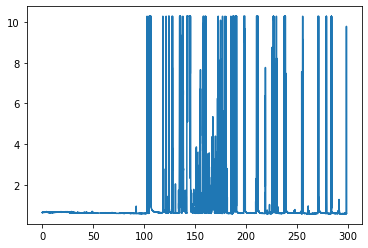

In [33]:
plt.plot(odor.sync_time, odor.odor)

### FOR SMALLER SLOT WIND PARTICLE ANIMATION

In [34]:
query = 'sync_time >= 150 and sync_time <=180'
df_t = odor.query(query)
df_we = we.query(query)
df_ns = ns.query(query)

In [26]:
fig = plt.figure()
ax = plt.axes(xlim=(-180,0), ylim=(-310,0))
ax.set_xlabel('Eastwest (meters)')
ax.set_ylabel('NorthSouth (meters)')
plt.close()
line, = ax.plot([],[], 'o', lw=2)

def init_():
    line.set_data_([],[])
    return line,

def get_data_x_(i):
    return df_we.loc[i]

def get_data_y_(i):
    return df_ns.loc[i]

def update_(i):
    x = get_data_x_(i)
    y = get_data_y_(i)
    line.set_data_(x,y)
    return line,

anim = animation.FuncAnimation(fig,update,frames = pd.Index.intersection(df_we.index,df_ns.index),
                              interval = 5, blit=False)
HTML(anim.to_html5_video())
#ani.save('../../../Research/Images/Video/smaller_flow.mp4', fps=3, extra_args=['-vcodec', 'libx264'])

In [35]:
odor

,master_time,sync_time,odor,trisonica_U,trisonica_V,lat,lon
0,1.603221e+09,0.000000,0.634854,0.280000,1.160000,40.793749,-119.157556
1,1.603221e+09,0.004997,0.635494,0.289993,1.160000,40.793749,-119.157556
2,1.603221e+09,0.009995,0.635827,0.299985,1.160000,40.793749,-119.157556
3,1.603221e+09,0.014992,0.635718,0.309978,1.160000,40.793749,-119.157556
4,1.603221e+09,0.019989,0.635305,0.319970,1.160000,40.793749,-119.157556
...,...,...,...,...,...,...,...
59757,1.603221e+09,298.620872,0.591438,1.333149,-1.755375,40.793697,-119.157631
59758,1.603221e+09,298.625870,0.589259,1.496149,-1.733239,40.793697,-119.157631
59759,1.603221e+09,298.630867,0.589552,1.331477,-1.796238,40.793697,-119.157631
59760,1.603221e+09,298.635864,0.590273,1.110641,-1.873829,40.793697,-119.157631


### Converting lat lon information to meters

In [46]:
odor= pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Interpolated_0.h5')
time= odor.master_time-odor.master_time[0]
odor.insert(1,'sync_time',time) 

In [47]:
from shapely.geometry import Point
odor['geometry'] = odor.apply(lambda row: Point(row.lon, row.lat), axis=1)


In [48]:
geodf = gpd.GeoDataFrame(odor)
geodf.crs= {'init': 'epsg:4326'}
# change the projection of geodf
geodf = geodf.to_crs("+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_def")

In [49]:
geodf["x"] = geodf.geometry.apply(lambda row:row.x)
geodf["y"] = geodf.geometry.apply(lambda row:row.y)

In [50]:
#source location to meters

source = (40.79376709443614, -119.15757512132207)
u =  utm.from_latlon(40.79376709443614, -119.15757512132207)

### Plotting odor encounters in meters

In [51]:
xfromsrc= geodf.x-u[0]
geodf.insert(10,'xsrc',xfromsrc) 

In [52]:
yfromsrc = geodf.y-u[1]
geodf.insert(11,'ysrc', yfromsrc)

(-16.0, 3.0)

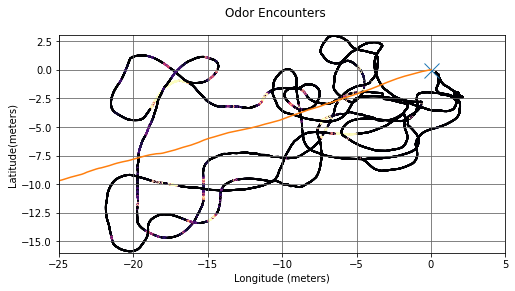

In [53]:
fig, ax = plt.subplots(1, figsize=(8, 4))
fig.suptitle('Odor Encounters')

# Plot the data
ax.scatter(geodf.xsrc, geodf.ysrc, c=geodf.odor, cmap='magma', s= 0.8)
ax.set_xlabel('Longitude (meters)')
ax.set_ylabel('Latitude(meters)')
plt.plot(0,0, marker='x', markersize=15)
# Show the grid lines as dark grey lines
ax.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(we.particle0,ns.particle0)
ax.set_xlim(-25,5)
ax.set_ylim(-16,3)

In [54]:
query = 'odor >= 7'
df_t=geodf.query(query)

(-16.0, 3.0)

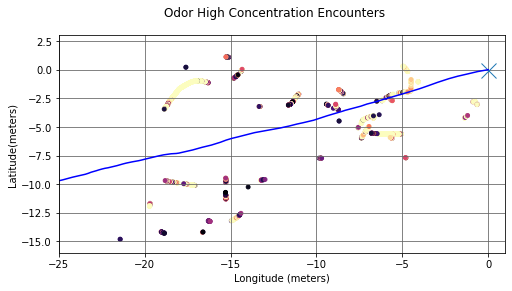

In [55]:
fig, ax = plt.subplots(1, figsize=(8, 4))
fig.suptitle('Odor High Concentration Encounters')

# Plot the data
ax.scatter(df_t.xsrc, df_t.ysrc, c=df_t.odor, cmap='magma', s= 15)
ax.set_xlabel('Longitude (meters)')
ax.set_ylabel('Latitude(meters)')
plt.plot(0,0, marker='x', markersize=15)
# Show the grid lines as dark grey lines
ax.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(we.particle0,ns.particle0, markersize=20, c='b')
ax.set_xlim(-25,1)
ax.set_ylim(-16,3)

In [56]:
fig = plt.figure()
ax = plt.axes(xlim=(-25,1), ylim=(-16,3))
ax.set_xlabel('Eastwest (meters)')
ax.set_ylabel('NorthSouth (meters)')
plt.close()

wind, = ax.plot([],[], 'o', color="b", lw=2)
line, = ax.plot([],[], 'o', color = "r", lw=2)

def init_():
    #wind.set_data([],[])
    line.set_data([],[])   
    return line,

def get_data_x_(i):
    return geodf.xsrc[i]

def get_data_y_(i):
    return geodf.ysrc[i]

In [17]:
def update(i):
#     wex = we.loc[i]
#     nsy = ns.loc[i]
#     wind.set_data(wex,nsy)
    x = get_data_x_(i)
    y = get_data_y_(i)
    line.set_data(x,y)

    return line,

In [21]:
ani = animation.FuncAnimation(fig,update,frames = 500,
                              interval = 5, blit=False)

#ani.save('../../../Research/Images/Video/smaller_flow.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(ani.to_html5_video())

